In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Dataset creation

In [2]:
mean_01= np.array([1,0.5])
cov_01= np.array([[1,0.1],[0.1,1]])
mean_02= np.array([4,5])
cov_02=np.array([[1.21,.1],[.1,1.3]])


In [3]:
dist_01=np.random.multivariate_normal(mean_01,cov_01,size=500)
dist_02=np.random.multivariate_normal(mean_02,cov_02,size=500)
print('dist_01 shape-',dist_01.shape)
print('dist_02 shape-',dist_01.shape)

dist_01 shape- (500, 2)
dist_02 shape- (500, 2)


Distribution visualistion

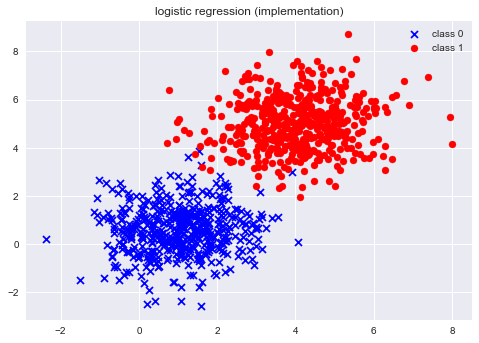

In [4]:
plt.style.use('seaborn')

plt.scatter(dist_01[:,0],dist_01[:,1],marker='x',color='blue',label='class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],marker='o',color='red', label='class 1')
plt.title('logistic regression (implementation)')
plt.legend()
plt.show()

 Creating dataset of 1000 points and dividing into training and testing

In [5]:
data=np.zeros((1000,3))
data[:500,:2]=dist_01
data[500:,:2]=dist_02
data[500:,-1]=1
np.random.shuffle(data)
split=int(0.8*data.shape[0])
x_train=data[:split,:-1]
x_test=data[split:,:-1]
y_train=data[:split,-1]
y_test=data[:split,-1]
y_train= y_train.reshape((-1,1))
y_test= y_test.reshape((-1,1))
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(800, 2) (200, 2) (800, 1) (800, 1)


In [6]:
print(x_train)

[[3.77338792 4.39773894]
 [3.64719488 5.95795867]
 [5.07937906 4.46664052]
 ...
 [0.11592271 1.26316177]
 [3.1550157  5.64435687]
 [3.21842338 5.09574389]]


APPLYING LOGISTIC REGRESSION

In [7]:
def Hypothesis(theta,x,b):
    out=b+np.dot(x,theta)    
    return sigmoid(out)

def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def error(y,hx):
    err=0.0
    err= y*np.log2(hx)+(1-y)*np.log2(1-hx)
    #print('error:',err)
    err=np.sum(err)
    return -err/y.shape[0]
    
def gradient(x,y,theta,b):
    m= theta.shape[0]
    grad=np.zeros((m,1))
    hx=Hypothesis(theta,x,b)
    #print("hx:",hx)
    
    for i in range(grad.shape[0]):
        TEMP=x[:,i].reshape((-1,1))*(y-hx)
        #print("TEMP",TEMP.shape)
        grad[i]=np.sum(TEMP)
        #print("grad:",grad)
    b_grad=np.sum(y-hx)
    #print("bias_grad",b_grad)
    
    
    err= error(y,hx)
    return grad,b_grad,err
def plotError(error_list):
    plt.plot(error_list)
    plt.show()
    return

def gradient_descent(x,y,theta,b,learning_rate=1.5,max_iterations=100):
    error_list=[]
    for i in range(max_iterations):
        grad,b_grad,err= gradient(x,y,theta,b)
        #print("theta before",i,":",theta)
        theta+=learning_rate*grad
        #print("theta after",i,":",theta)
        #print("b before",i,":",b)
        b+=learning_rate*b_grad
        #print("b after",i,":",b)
        error_list.append(err)
    
    return theta,b,error_list
    
    



In [8]:
theta= np.ones((x_train.shape[1],1))
b= 1.0
theta,b,error_list=gradient_descent(x_train,y_train,theta,b)

/Users/pk/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/Users/pk/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log2
  # Remove the CWD from sys.path while we load stuff.
/Users/pk/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


In [9]:
print(theta)
print(b)

[[302.5536794 ]
 [379.12864622]]
-1746.9131006976556


In [10]:
x_line= np.linspace(-2,8)
y=b+x_line*theta[0]
y=y/(1-theta[1])
print(y)

[ 6.22015942  6.05686671  5.89357401  5.73028131  5.5669886   5.4036959
  5.2404032   5.07711049  4.91381779  4.75052509  4.58723238  4.42393968
  4.26064698  4.09735427  3.93406157  3.77076887  3.60747616  3.44418346
  3.28089076  3.11759805  2.95430535  2.79101265  2.62771994  2.46442724
  2.30113454  2.13784183  1.97454913  1.81125643  1.64796372  1.48467102
  1.32137832  1.15808561  0.99479291  0.83150021  0.6682075   0.5049148
  0.3416221   0.17832939  0.01503669 -0.14825601 -0.31154872 -0.47484142
 -0.63813412 -0.80142683 -0.96471953 -1.12801223 -1.29130494 -1.45459764
 -1.61789034 -1.78118305]


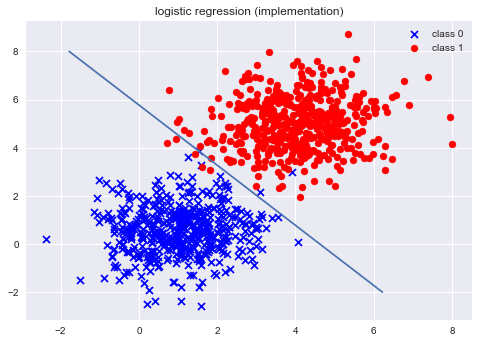

In [17]:
plt.style.use('seaborn')

plt.scatter(dist_01[:,0],dist_01[:,1],marker='x',color='blue',label='class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],marker='o',color='red', label='class 1')
plt.title('logistic regression (implementation)')
plt.plot(y,x_line)
plt.legend()
plt.show()

In [12]:
def predict(theta,x,b):
    
    confidence = Hypothesis(theta,x,b)
    return np.where(confidence>=0.5,0,1)
def accuracy(prediction,y_test):
    ctr=0
    for i in range(prediction.shape[0]):
        if prediction[i]==y_test[i]:
            ctr+=1
    return float(ctr/prediction.shape[0])




In [13]:
prediction=predict(theta,x_test,b)
accuracy(prediction, y_test)

/Users/pk/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


0.48

In [16]:
print(theta/x_train.shape[0])
print(b/x_train.shape[0])

[[0.3781921 ]
 [0.47391081]]
-2.1836413758720696
